<a href="https://colab.research.google.com/github/ArtNatalya/Python_CL_2023/blob/main/%D0%A1%D0%B0%D0%BF%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import os

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    # Приводим текст к нижнему регистру
    text = text.lower()
    # Удаляем знаки препинания
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Токенизируем текст
    tokens = word_tokenize(text)
    # Удаляем стоп-слова и слова, которые могут помешать
    stop_words = set(stopwords.words('russian'))
    tokens = [word for word in tokens if word not in stop_words]
    # Лемматизируем слова
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [ ]:
def create_corpus(text):
    # Читаем текст из файла
    with open(text, 'r', encoding='utf-8') as f:
        text = f.read()
        return text

In [ ]:
text = create_corpus ('Vedmak.txt')

In [ ]:
text [:200]

'Annotation\n\n\nАнджей Сапковский – один из тех редких авторов, чьи произведения не про сто обрели в нашей стране культовый статус, но стали частью РОССИЙСКОЙ фантастики. Более того, Сапковский – писател'

In [ ]:
# Предобрабатываем текст
preprocessed_text = preprocess_text(text)

In [ ]:
preprocessed_text [:200]

['annotation',
 'анджей',
 'сапковский',
 '–',
 'тех',
 'редких',
 'авторов',
 'чьи',
 'произведения',
 'сто',
 'обрели',
 'нашей',
 'стране',
 'культовый',
 'статус',
 'стали',
 'частью',
 'российской',
 'фантастики',
 'сапковский',
 '–',
 'писатель',
 'обладающий',
 'талантом',
 'создавать',
 'абсолютно',
 'оригинальные',
 'произведения',
 'жанре',
 'фэнтези',
 'полностью',
 'свободные',
 'влияния',
 'извне',
 'однако',
 'связанные',
 'классической',
 'мифологи',
 'ческой',
 'традицией',
 'книги',
 'сапковского',
 'просто',
 'блистательны',
 'литературности',
 'формы',
 'глубине',
 'содержания',
 'являют',
 'собой',
 'картину',
 'мира',
 '–',
 'мира',
 '«',
 'меча',
 'магии',
 '»',
 'мира',
 'искрометного',
 'юмора',
 'захватывающего',
 'внимание',
 'читателя',
 'трогающего',
 'душу',
 'сага',
 'цири',
 'геральте',
 '–',
 'одна',
 'легендарнейших',
 'саг',
 'жанре',
 'фэнтези',
 'анджей',
 'сапковский',
 'последнее',
 'желаниеглас',
 'рассудка',
 'i',
 'ведьмак',
 'глас',
 'рассудка'

In [ ]:
def save_corpus(corpus, file_name):
    # Сохраняем корпус в файл
    with open(file_name, 'w', encoding='utf-8') as f:
        for i in range(len(corpus)):
            f.write(corpus[i] + '\n')

In [ ]:
# Пример использования
save_corpus(preprocessed_text, 'Vedmak_corpus.txt')

**далее пытаемся создать облако**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

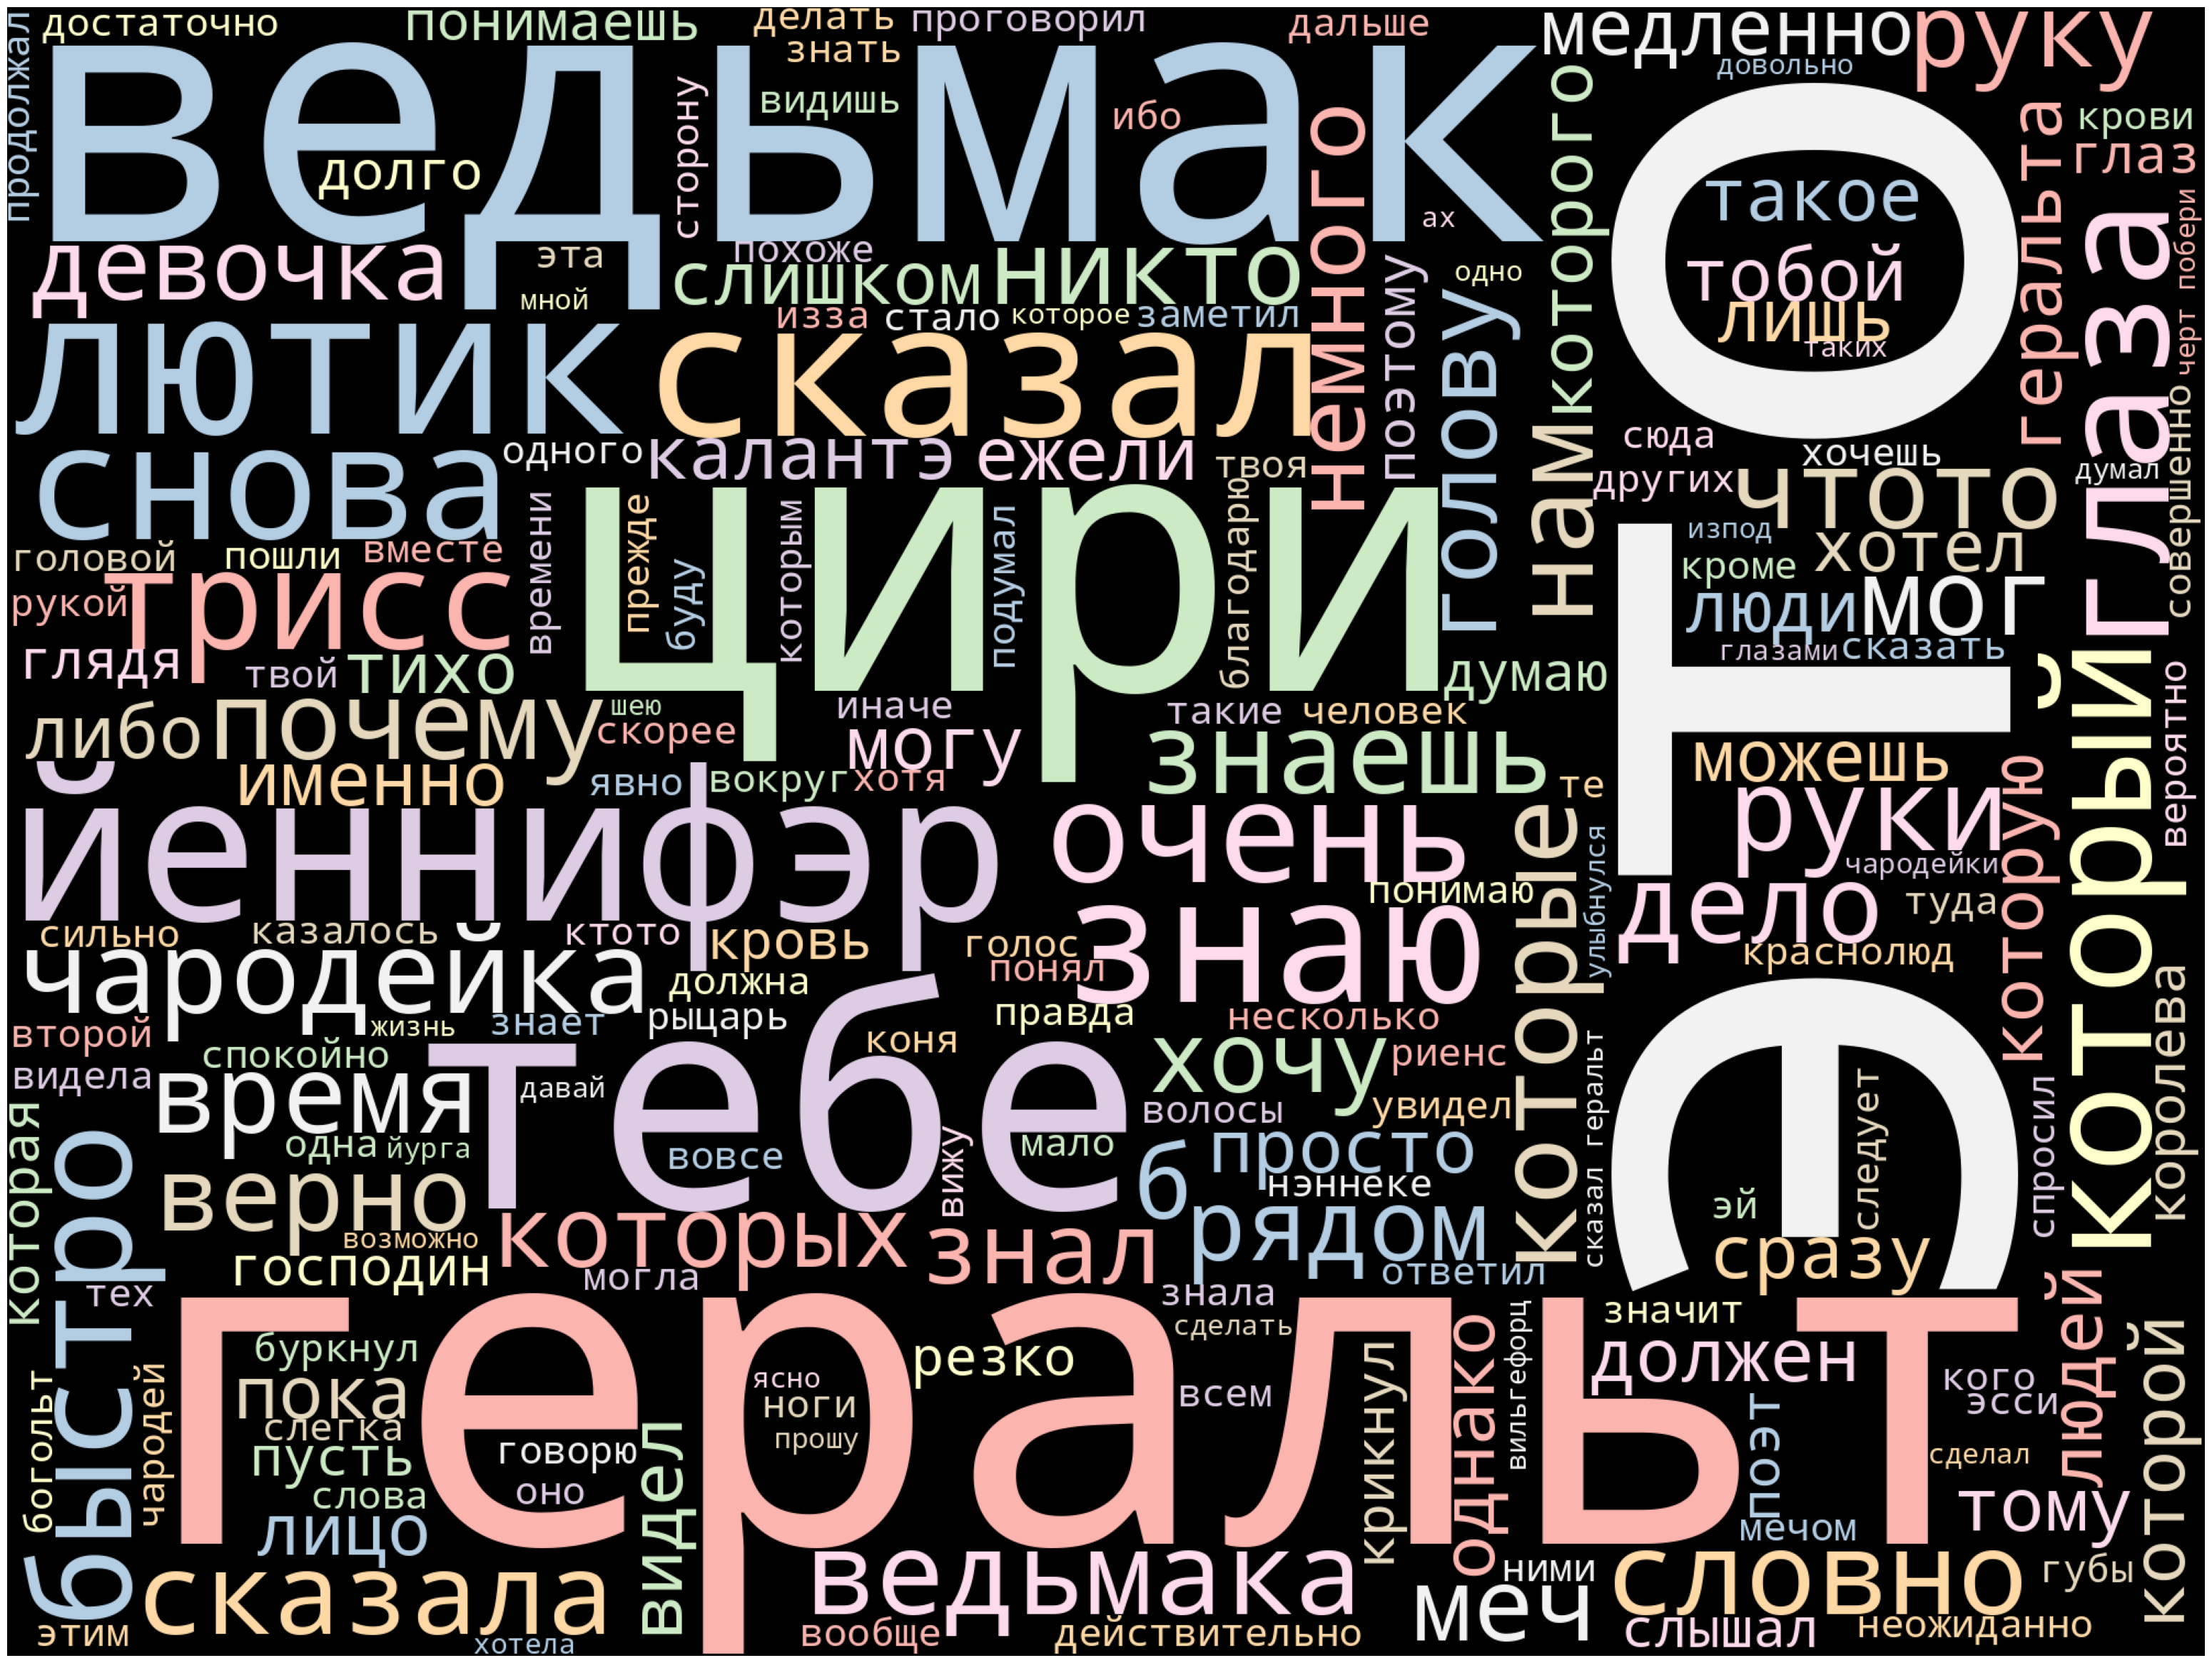

In [ ]:
wordcloud = WordCloud(width = 2000, height = 1500, background_color='black', colormap='Pastel1').generate(', '.join(preprocessed_text))
plt.figure(figsize=(40, 30)) # Устанавливаем размер картинки
plt.imshow(wordcloud) # Что изображаем
plt.axis("off") # Без подписей на осях
plt.show() # показать изображение

тут происходит попытка визуализации графов сети, выглядит монструозно, но и сборник по ведьмаку достаточно объемный

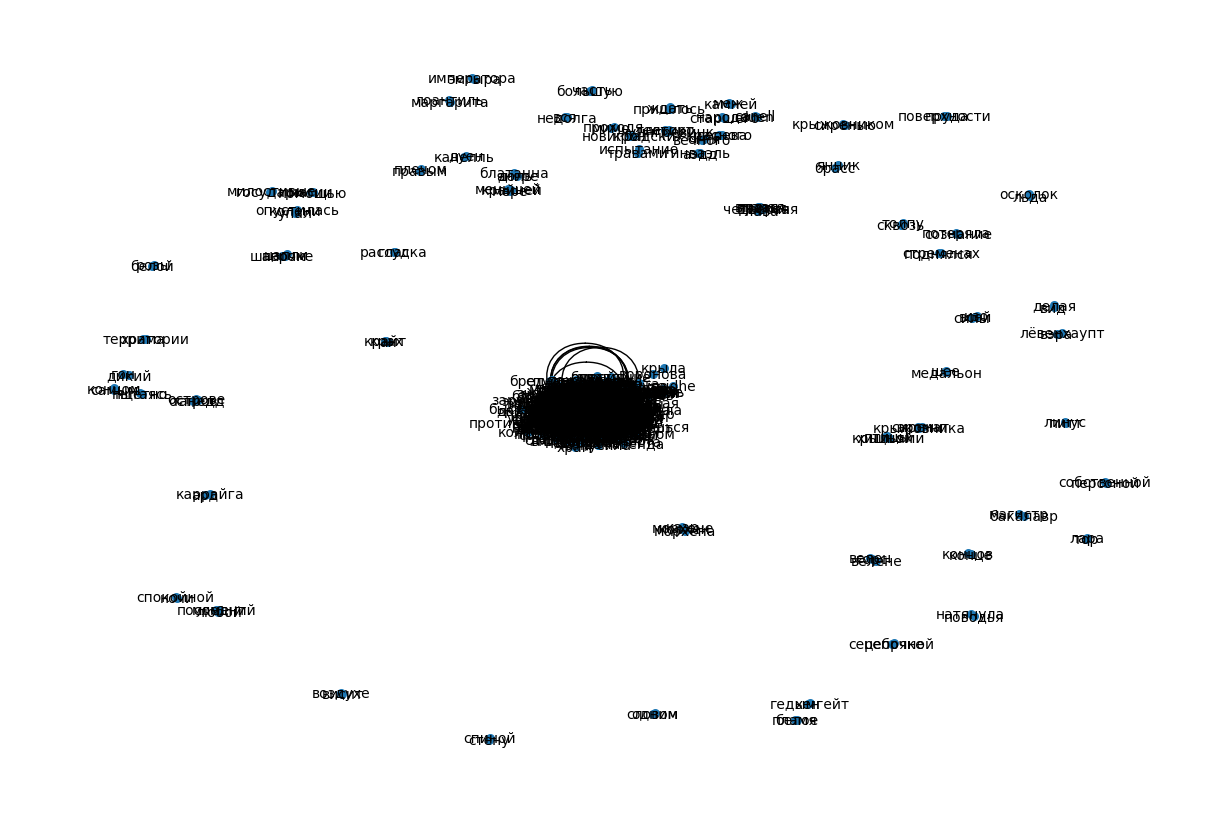

In [ ]:
import re
import nltk
import networkx as nx
import matplotlib.pyplot as plt

# Загрузка текста из файла
with open("Vedmak_corpus.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Токенизация текста
words = nltk.word_tokenize(text)

# Создание графа сети
G = nx.Graph()

# Добавление вершин (слов) в граф
for i in range(len(words) - 1):
    word1 = words[i]
    word2 = words[i + 1]
    if not G.has_edge(word1, word2):
        G.add_edge(word1, word2, weight=0)
    G[word1][word2]["weight"] += 1

# Удаление вершин с низкой весовой связью
threshold = 5
edges_to_remove = [(word1, word2) for word1, word2, data in G.edges(data=True) if data["weight"] <= threshold]
G.remove_edges_from(edges_to_remove)

# Удаление изолированных вершин
G.remove_nodes_from(list(nx.isolates(G)))

# Отрисовка графа сети
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=30, font_size=10)
plt.show()

далее во всей этой красоте мы ищем значимые слова по tf-idf

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np

# Открываем файл для чтения
with open("Vedmak_corpus.txt", "r", encoding="utf-8") as file:
    # Читаем содержимое файла
    text = file.read()

# Список слов, которые нужно удалить из корпуса, поскольку они могут мешать при работе
words_to_remove = ["это", "геральт", "цири", "йеннифэр", "лютик", "трисс"]

# Удаление указанных слов из текста
for word in words_to_remove:
    text = text.replace(word, "")

# Вычисляем TF-IDF значений для слов
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([text])
feature_names = tfidf_vectorizer.get_feature_names_out()

# Преобразуем TF-IDF матрицу в массив numpy
tfidf_array = tfidf_matrix.toarray()[0]

# Создаем словарь слово-значение TF-IDF
word_tfidf = dict(zip(feature_names, tfidf_array))

# Сортируем слова по значению TF-IDF
sorted_words = sorted(word_tfidf.items(), key=lambda x: x[1], reverse=True)
top_words = []

 #тут мы вручную чистим от вырезанных слов список значимых
for word, tfidf_value in sorted_words:
    if word not in words_to_remove:
        top_words.append((word, tfidf_value))

# Выводим 10 самых значимых слов
top_words = sorted_words[:10]
print("Топ 10 значимых слов:")
for word, tfidf_value in top_words:
    print(f"{word}: {tfidf_value:.4f}")

Топ 10 значимых слов:
ведьмак: 0.3486
сказал: 0.2504
тебе: 0.2147
знаю: 0.1442
глаза: 0.1362
голову: 0.1259
снова: 0.1101
время: 0.1066
очень: 0.0963
сказала: 0.0956


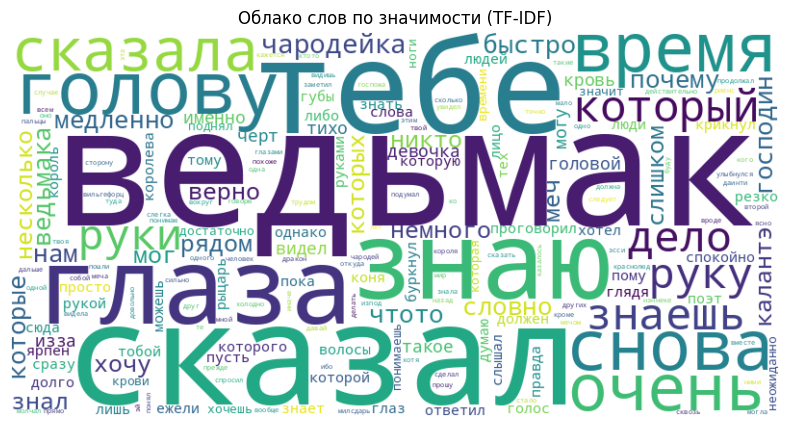

In [ ]:
# Визуализация облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_tfidf)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Облако слов по значимости (TF-IDF)')
plt.show()

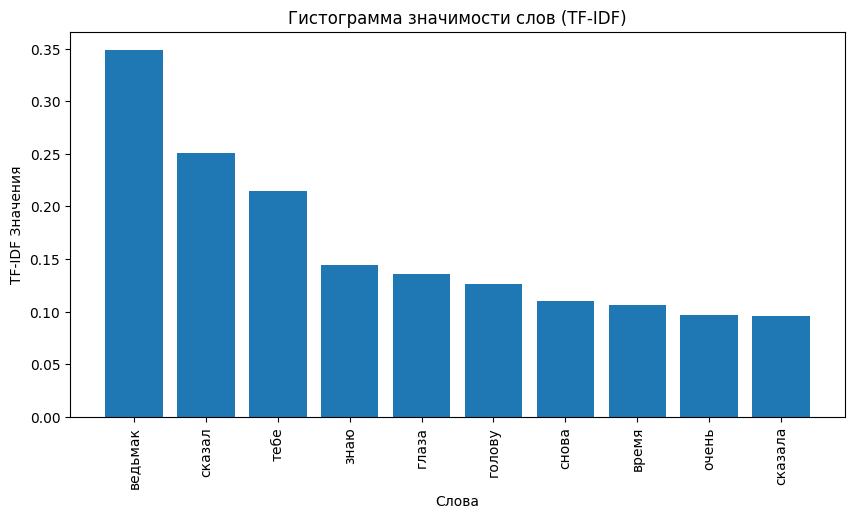

In [ ]:
plt.figure(figsize=(10, 5))
words = [x[0] for x in top_words[:10]]
tfidf_values = [x[1] for x in top_words[:10]]
plt.bar(range(len(words)), tfidf_values, tick_label=words)
plt.xticks(rotation=90)
plt.title('Гистограмма значимости слов (TF-IDF)')
plt.xlabel('Слова')
plt.ylabel('TF-IDF Значения')
plt.show()

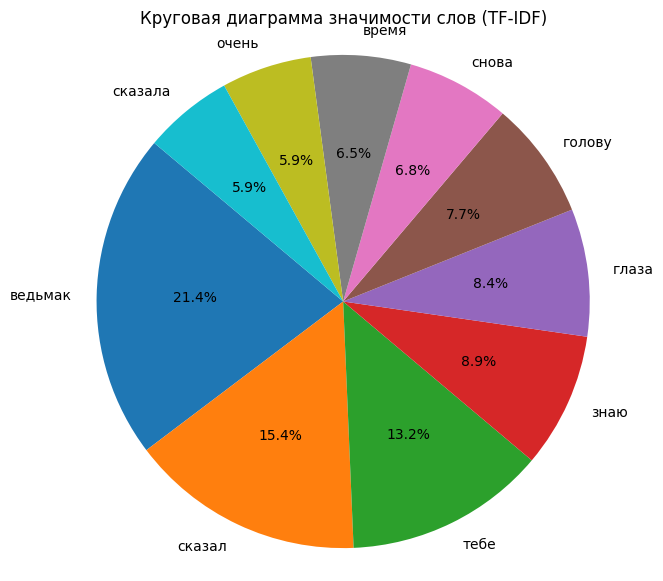

In [ ]:
# Круговая диаграмма значимости слов
top_words_dict = dict(top_words)
plt.figure(figsize=(7, 7))
plt.pie(top_words_dict.values(), labels=top_words_dict.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Круговая диаграмма значимости слов (TF-IDF)')
plt.axis('equal')
plt.show()

In [ ]:
import random

# Открываем файл для чтения
with open('Vedmak_corpus.txt', 'r', encoding='utf-8') as file:
    # Читаем все строки из файла
    lines = file.readlines()

# Выбираем 10 случайных строк
random_lines = random.sample(lines, 10)

# Выводим выбранные строки на экран
for line in random_lines:
    print(line.strip())

труднее
б
прежде
чародеев
косматые
имело
ведьмак
извиняйся
геральт
трисс


In [ ]:
import random
import re

# Функция для удаления слов из строки
def remove_words(sentence, words_to_remove):
    for word in words_to_remove:
        # Используем регулярное выражение для замены слова с учётом регистра и границ слова
        sentence = re.sub(r'\b{}\b'.format(word), '', sentence, flags=re.IGNORECASE)
    return sentence

# Открываем файл для чтения
with open('Vedmak_corpus.txt', 'r', encoding='utf-8') as file:
    # Читаем все строки из файла
    lines = file.readlines()

# Слова, которые нужно удалить из текста
words_to_remove = ["геральт", "йэннифер", "трисс", "цири", "лютик"]

# Удаляем указанные слова из каждой строки
cleaned_lines = [remove_words(line, words_to_remove) for line in lines]

# Удаляем пустые строки
cleaned_lines = [line.strip() for line in cleaned_lines if line.strip()]

# Выбираем 10 случайных строк
random_lines = random.sample(cleaned_lines, 10)

# Выводим выбранные строки на экран
for line in random_lines:
    print(line)

держится
вконец
заставить
хочу
молокосос
брат
делаешь
четыре
–
встал
